In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [2]:
from paratext import TrainingCorpus, TrainingText, Snippet

corpus = TrainingCorpus('../train')

In [3]:
text = TrainingText.from_file('../train/98-0.xml')

In [4]:
from boltons.iterutils import windowed

data = []
for path in corpus.paths():
    
    text = TrainingText.from_file(path)
    
    front = text.front()
    body = text.body_beginning()
    
    for lines in windowed(front.splitlines(), 10):
        snippet = Snippet('\n'.join(lines))
        data.append(snippet.features(dict(front=1)))
    
    for lines in windowed(body.splitlines(), 10):
        snippet = Snippet('\n'.join(lines))
        data.append(snippet.features(dict(front=0)))

In [5]:
len(data)

4887

In [6]:
import pandas as pd

df = pd.DataFrame(data)

In [7]:
df

,blank_line_ratio,caps_ratio,cd_ratio,chapter_ratio,dialogic_punct_ratio,digit_ratio,dt_ratio,front,jj_ratio,jjr_ratio,...,rb_ratio,rbr_ratio,rbs_ratio,vb_ratio,vbd_ratio,vbg_ratio,vbn_ratio,vbp_ratio,vbz_ratio,word_count
0,0.888889,0.073171,0.000000,0.000,0.000000,0.000000,0.000000,1,0.250000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,4
1,0.888889,0.073171,0.000000,0.000,0.000000,0.000000,0.000000,1,0.250000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,4
2,0.800000,0.333333,0.000000,0.000,0.000000,0.000000,0.000000,1,0.142857,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,7
3,0.777778,0.333333,0.000000,0.000,0.000000,0.000000,0.000000,1,0.142857,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,7
4,0.700000,0.310811,0.000000,0.000,0.000000,0.000000,0.000000,1,0.100000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,10
5,0.666667,0.310811,0.000000,0.000,0.000000,0.000000,0.000000,1,0.100000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,10
6,0.777778,0.476190,0.000000,0.000,0.000000,0.000000,0.000000,1,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6
7,0.777778,0.476190,0.000000,0.000,0.000000,0.000000,0.000000,1,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6
8,0.700000,0.411765,0.125000,0.125,0.000000,0.019608,0.000000,1,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8
9,0.666667,0.411765,0.125000,0.125,0.000000,0.019608,0.000000,1,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8


In [8]:
X = df.drop('front', axis=1)
y = df['front']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Logistic regression

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
model.score(X_test, y_test)

0.97546012269938653

# Testing

In [22]:
def plot_chunk_scores(path, lines=200):
    
    text = Text.from_file(path)
    
    beginning = text.text.splitlines()[:lines]

    slices = []
    for lines in windowed(beginning, 10):
        snippet = Snippet('\n'.join(lines))
        slices.append(snippet.features())
    
    slices_df = pd.DataFrame(slices)
    
    scores = model.predict_proba(slices_df)
    
    plt.figure(figsize=(15, 5))
    plt.ylim(-0.1, 1.1)
    plt.plot(scores[:,1])
    plt.show()

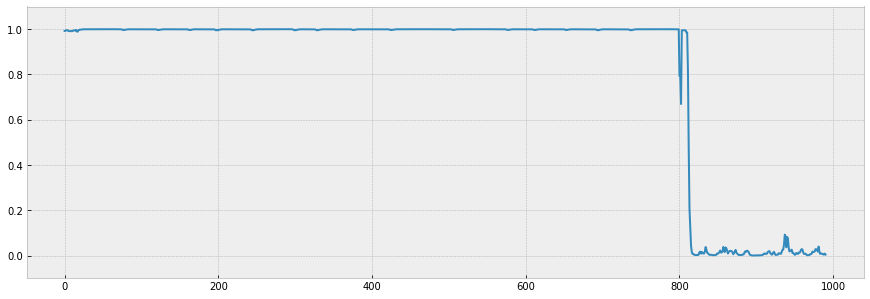

In [24]:
plot_chunk_scores('texts/2600-0.txt', 1000)

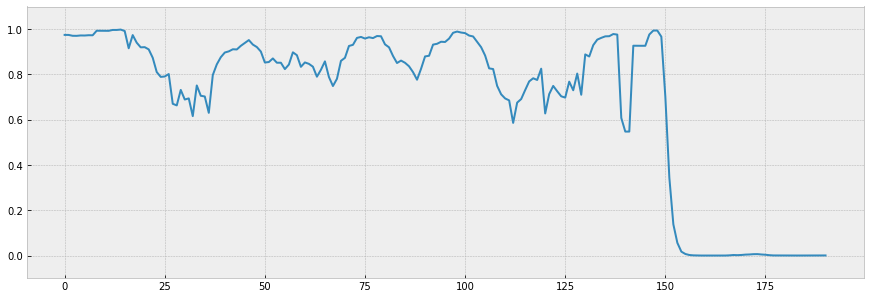

In [25]:
plot_chunk_scores('texts/brothers-k.txt')

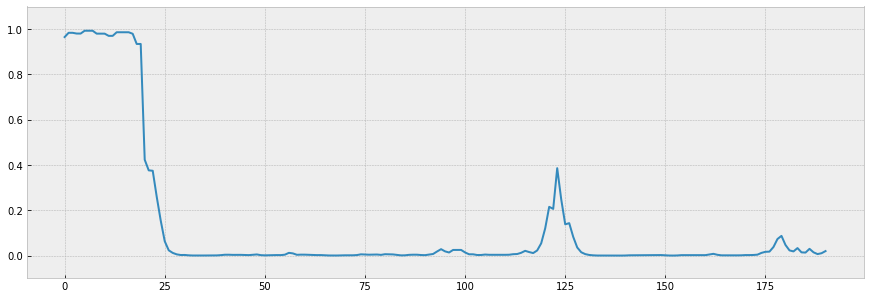

In [26]:
plot_chunk_scores('texts/1399-0.txt')